In [274]:
import numpy as np
import pandas as pd 
import seaborn as sns
import pickle 
import regex as re
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_set = pickle.load(open( "full_data.pickle", "rb" ))

In [3]:
data_set #this is already sorted well -last column is y 

,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000270726.4,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,index,id,drug_name,vital_status
0,14.125848,0.093522,30.585785,1.278731,1.062113,0.764395,1.199922,17.554991,6.304686,5.136213,...,0.0,0.0,0.0,0.0,0.0,0.0,455fd7d4-5ff4-423f-83ce-4630aef89bb7,455fd7d4-5ff4-423f-83ce-4630aef89bb7,sorafenib,dead
1,22.776941,2.057021,24.838891,2.461498,0.461543,2.207669,8.707784,29.256859,4.376688,6.046493,...,0.0,0.0,0.0,0.0,0.0,0.0,455fd7d4-5ff4-423f-83ce-4630aef89bb7,455fd7d4-5ff4-423f-83ce-4630aef89bb7,sorafenib,dead
2,19.023014,6.957998,15.983518,1.650498,0.330992,1.450858,5.505354,26.203638,4.645046,5.568023,...,0.0,0.0,0.0,0.0,0.0,0.0,822cf6c1-dd65-4814-94b1-0c335208ad9b,822cf6c1-dd65-4814-94b1-0c335208ad9b,oncophage vaccine,dead
3,12.314532,0.130207,26.086970,1.598978,0.365375,6.342112,3.582689,33.370253,4.451278,4.956177,...,0.0,0.0,0.0,0.0,0.0,0.0,822cf6c1-dd65-4814-94b1-0c335208ad9b,822cf6c1-dd65-4814-94b1-0c335208ad9b,oncophage vaccine,dead
4,11.800582,0.152335,39.217148,4.760523,0.863156,1.044859,13.206980,31.103094,8.694065,8.340499,...,0.0,0.0,0.0,0.0,0.0,0.0,9fc40b03-0b56-4b1f-93ed-dbc455ae3fd9,9fc40b03-0b56-4b1f-93ed-dbc455ae3fd9,interferon,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,ifosfamide,dead
492,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,gemcitabine,dead
493,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,docetaxel,dead
494,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,temozolomide,dead


In [4]:
#change the gene names
change_name_file = 'mart_export.txt'
gene_names = {}
with open(change_name_file) as fh:
    for line in fh:
        engs, gene_name = line.split(',', 1)
        gene_names[gene_name.split('.')[0]] = engs
gene_names

{'Gene stable ID version\n': 'Gene name',
 'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1',
 'ENSG00000198888': 'MT-ND1',
 'ENSG00000210100': 'MT-TI',
 'ENSG00000210107': 'MT-TQ',
 'ENSG00000210112': 'MT-TM',
 'ENSG00000198763': 'MT-ND2',
 'ENSG00000210117': 'MT-TW',
 'ENSG00000210127': 'MT-TA',
 'ENSG00000210135': 'MT-TN',
 'ENSG00000210140': 'MT-TC',
 'ENSG00000210144': 'MT-TY',
 'ENSG00000198804': 'MT-CO1',
 'ENSG00000210151': 'MT-TS1',
 'ENSG00000210154': 'MT-TD',
 'ENSG00000198712': 'MT-CO2',
 'ENSG00000210156': 'MT-TK',
 'ENSG00000228253': 'MT-ATP8',
 'ENSG00000198899': 'MT-ATP6',
 'ENSG00000198938': 'MT-CO3',
 'ENSG00000210164': 'MT-TG',
 'ENSG00000198840': 'MT-ND3',
 'ENSG00000210174': 'MT-TR',
 'ENSG00000212907': 'MT-ND4L',
 'ENSG00000198886': 'MT-ND4',
 'ENSG00000210176': 'MT-TH',
 'ENSG00000210184': 'MT-TS2',
 'ENSG00000210191': 'MT-TL2',
 'ENSG00000198786': 'MT-ND5',
 'ENSG00

In [5]:
data_set = data_set.rename(columns = lambda x: x.split('.')[0])
data_set 

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSGR0000270726,ENSGR0000275287,ENSGR0000276543,ENSGR0000277120,ENSGR0000280767,ENSGR0000281849,index,id,drug_name,vital_status
0,14.125848,0.093522,30.585785,1.278731,1.062113,0.764395,1.199922,17.554991,6.304686,5.136213,...,0.0,0.0,0.0,0.0,0.0,0.0,455fd7d4-5ff4-423f-83ce-4630aef89bb7,455fd7d4-5ff4-423f-83ce-4630aef89bb7,sorafenib,dead
1,22.776941,2.057021,24.838891,2.461498,0.461543,2.207669,8.707784,29.256859,4.376688,6.046493,...,0.0,0.0,0.0,0.0,0.0,0.0,455fd7d4-5ff4-423f-83ce-4630aef89bb7,455fd7d4-5ff4-423f-83ce-4630aef89bb7,sorafenib,dead
2,19.023014,6.957998,15.983518,1.650498,0.330992,1.450858,5.505354,26.203638,4.645046,5.568023,...,0.0,0.0,0.0,0.0,0.0,0.0,822cf6c1-dd65-4814-94b1-0c335208ad9b,822cf6c1-dd65-4814-94b1-0c335208ad9b,oncophage vaccine,dead
3,12.314532,0.130207,26.086970,1.598978,0.365375,6.342112,3.582689,33.370253,4.451278,4.956177,...,0.0,0.0,0.0,0.0,0.0,0.0,822cf6c1-dd65-4814-94b1-0c335208ad9b,822cf6c1-dd65-4814-94b1-0c335208ad9b,oncophage vaccine,dead
4,11.800582,0.152335,39.217148,4.760523,0.863156,1.044859,13.206980,31.103094,8.694065,8.340499,...,0.0,0.0,0.0,0.0,0.0,0.0,9fc40b03-0b56-4b1f-93ed-dbc455ae3fd9,9fc40b03-0b56-4b1f-93ed-dbc455ae3fd9,interferon,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,ifosfamide,dead
492,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,gemcitabine,dead
493,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,docetaxel,dead
494,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,temozolomide,dead


In [6]:
data_set = data_set.rename(columns = gene_names)
data_set.head(2)

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSGR0000270726,ENSGR0000275287,ENSGR0000276543,ENSGR0000277120,ENSGR0000280767,ENSGR0000281849,index,id,drug_name,vital_status
0,14.125848,0.093522,30.585785,1.278731,1.062113,0.764395,1.199922,17.554991,6.304686,5.136213,...,0.0,0.0,0.0,0.0,0.0,0.0,455fd7d4-5ff4-423f-83ce-4630aef89bb7,455fd7d4-5ff4-423f-83ce-4630aef89bb7,sorafenib,dead
1,22.776941,2.057021,24.838891,2.461498,0.461543,2.207669,8.707784,29.256859,4.376688,6.046493,...,0.0,0.0,0.0,0.0,0.0,0.0,455fd7d4-5ff4-423f-83ce-4630aef89bb7,455fd7d4-5ff4-423f-83ce-4630aef89bb7,sorafenib,dead


In [7]:
data_set[data_set['drug_name']=='gemictiabine'] #this is a misspelling
data_set.loc[277,'drug_name']='gemcitabine'

In [8]:
data_set['drug_name'] = data_set['drug_name'].str.replace(r"\s*\(.*\)\s*","")

In [9]:
gemcitabine_alias = ['Abine', 'Accogem', 'Acytabin', 'Antoril', 'axigem', 'Bendacitabin', 'Biogem', 'Boligem', 'Celzar', 'Citegin', 'Cytigem', 'Cytogem', 'Daplax', 'DBL', 'Demozar', 'Dercin', 'Emcitab', 'Enekamub', 'Eriogem', 'Fotinex', 'Gebina', 'Gemalata', 'Gembin', 'Gembine', 'Gembio', 'Gemcel', 'Gemcetin', 'Gemcibine', 'Gemcikal', 'Gemcipen', 'Gemcired', 'Gemcirena', 'Gemcit', 'Gemcitabin', 'Gemcitabina', 'Gemcitabine', 'Gemcitabinum', 'Gemcitan', 'Gemedac', 'Gemflor', 'Gemful', 'Gemita', 'Gemko', 'Gemliquid', 'Gemmis', 'Gemnil', 'Gempower', 'Gemsol', 'Gemstad', 'Gemstada', 'Gemtabine', 'Gemtavis', 'Gemtaz', 'Gemtero', 'Gemtra', 'Gemtro', 'Gemvic', 'Gemxit', 'Gemzar', 'Gentabim', 'Genuten', 'Genvir', 'Geroam', 'Gestredos', 'Getanosan', 'Getmisi', 'Gezt', 'Gitrabin', 'Gramagen', 'Haxanit', 'Jemta', 'Kalbezar', 'Medigem', 'Meditabine', 'Nabigem', 'Nallian', 'Oncogem', 'Oncoril', 'Pamigeno', 'Ribozar', 'Santabin', 'Sitagem', 'Symtabin', 'Yu Jie', 'Ze Fei', 'Zefei']
gemcitabine_alias= [name.lower() for name in gemcitabine_alias]
#gemcitabine_alias

In [10]:
data_set['drug_name']=['gemcitabine' if name in gemcitabine_alias else name for name in data_set.drug_name]

In [11]:
remove_index = data_set[(data_set.drug_name == '[not available]')|(data_set.drug_name == '[unknown]')].index #index values 89 347 444
remove_index
data_set.drop(remove_index, inplace=True)

In [12]:
data_set['drug_name']=['sorafenib' if 'nexavar' in name else name for name in data_set.drug_name]
data_set['drug_name']=['sorafenib' if 'bay-439006' in name else name for name in data_set.drug_name]
data_set['drug_name']=['sorafenib' if 'nexavaar' in name else name for name in data_set.drug_name]
data_set['drug_name']=['doxorubicin' if 'adriamycin' in name else name for name in data_set.drug_name]
data_set['drug_name']=['doxorubicin' if 'dox' in name else name for name in data_set.drug_name]
data_set['drug_name']=['doxorubicin' if 'rubex' in name else name for name in data_set.drug_name]
data_set['drug_name']=['sorafenib' if name=='naxavar' else name for name in data_set.drug_name]
data_set['drug_name']=['pazonib' if name=='votrient' else name for name in data_set.drug_name]
data_set['drug_name']=['sunitinib' if name=='sutent' else name for name in data_set.drug_name]
data_set['drug_name']=['docetaxel' if name=='taxotere' else name for name in data_set.drug_name]
data_set['drug_name']=['temsirolimus' if name=='torisel' else name for name in data_set.drug_name]
data_set['drug_name']=['avastin' if name=='bevacizumab' else name for name in data_set.drug_name]
data_set['drug_name']=['interferon alpha'if 'interferon' in name else name for name in data_set.drug_name]
data_set['drug_name']=['capecitabine' if 'xeloda' in name else name for name in data_set.drug_name]

data_set['drug_name']=['capecitabine' if 'capec' in name else name for name in data_set.drug_name]

data_set['drug_name']=['il-2' if 'il-2' in name else name for name in data_set.drug_name]
data_set['drug_name']=['interferon alpha' if '-a' in name else name for name in data_set.drug_name]
data_set['drug_name']=['cisplatin' if 'cisplat' in name else name for name in data_set.drug_name]
data_set['drug_name']=['everolimus' if 'afinitor' in name else name for name in data_set.drug_name]
data_set['drug_name']=['everolimus' if 'rad001' in name else name for name in data_set.drug_name]
data_set['drug_name']=['onocophage vaccine' if 'oncophage' in name else name for name in data_set.drug_name]
data_set['drug_name']=['trabectedin' if 'et-743' in name else name for name in data_set.drug_name]
data_set['drug_name']=['gefitinib' if 'iressa' in name else name for name in data_set.drug_name]
data_set['drug_name']=['dacarbazine' if 'dtic' in name else name for name in data_set.drug_name]
data_set['drug_name']=['axitinib' if 'axit' in name else name for name in data_set.drug_name]
data_set['drug_name']=['letrozole' if 'femara' in name else name for name in data_set.drug_name]
data_set['drug_name']=['pazopanib' if 'pazo' in name else name for name in data_set.drug_name]
#this can be cahnged to a dictionary later - its like this cause I was researching one drug at a time


In [13]:
#data_set(regex = '\w*\W*2', axis = 0)
data_set.drug_name = data_set.drug_name.str.replace(pat ="i\w*\W*2\w*", repl = 'il-2', regex=True)

In [14]:
data_set[data_set.drug_name=='evofosfamide']

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSGR0000270726,ENSGR0000275287,ENSGR0000276543,ENSGR0000277120,ENSGR0000280767,ENSGR0000281849,index,id,drug_name,vital_status


In [15]:
data_set.drug_name.value_counts() #set dead to 0, alive to 1 

gemcitabine            62
sunitinib              60
doxorubicin            46
docetaxel              39
sorafenib              35
                       ..
lymphocyte infusion     1
megace                  1
azd                     1
sulindac                1
5-fluorouracil          1
Name: drug_name, Length: 62, dtype: int64

In [16]:
data_set['vital_status']=[0 if status=='dead' else 1 for status in data_set.vital_status]

In [17]:
data_set.vital_status.value_counts()

0    263
1    229
Name: vital_status, dtype: int64

In [541]:
split_drug_status = data_set.groupby(['drug_name'])['vital_status'].value_counts().unstack()
graph1= split_drug_status.reset_index().sort_values([0], ascending=False).rename(columns={0:'Dead', 1:'Alive', 'drug_name':'Drug'})

In [551]:
graph1.Dead

46    39.0
19    24.0
44    23.0
3     22.0
25    20.0
      ... 
53     NaN
54     NaN
57     NaN
60     NaN
61     NaN
Name: Dead, Length: 62, dtype: float64

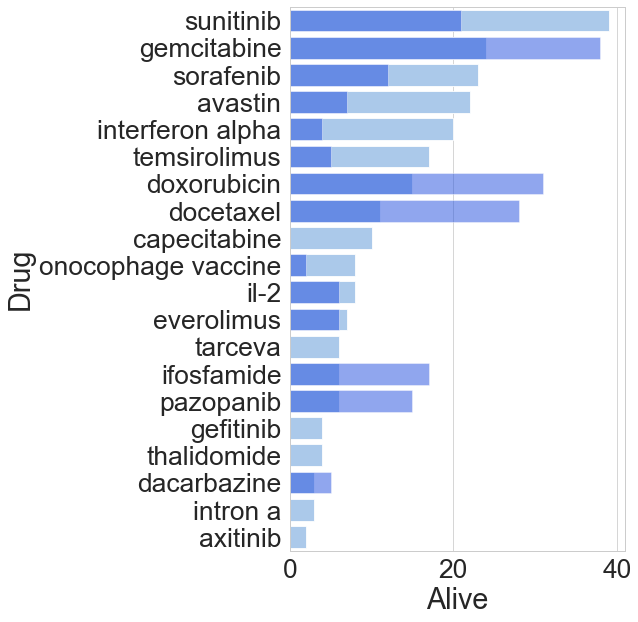

In [574]:
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=3)
f, ax = plt.subplots(figsize=(6, 10))
sns.set_color_codes("pastel")
sns.barplot(y="Drug", x="Dead", data=graph1.iloc[0:20,:],
            label="Dead", color="b", alpha = 1)
sns.set_color_codes("bright")
sns.barplot(y="Drug", x="Alive", data=graph1.iloc[0:20,:],
            label="Total Cases", color="b", alpha = 0.5)

plt.savefig("graph1.png")

In [19]:
# top 3 drugs
# gemcitabine            62
# sunitinib              60
# doxorubicin            46

In [20]:
gemcitabine_data = data_set[data_set.drug_name=='gemcitabine']

In [21]:
sunitinib_data = data_set[data_set.drug_name=='sunitinib']

In [22]:
doxorubicin_data = data_set[data_set.drug_name=='doxorubicin']

In [23]:
gemcitabine_data.vital_status.value_counts() #relatively even split!

1    38
0    24
Name: vital_status, dtype: int64

In [24]:
gemcitabine_data

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSGR0000270726,ENSGR0000275287,ENSGR0000276543,ENSGR0000277120,ENSGR0000280767,ENSGR0000281849,index,id,drug_name,vital_status
19,21.023010,4.698284,22.983041,2.520023,0.469418,1.552196,13.924939,28.691723,5.467230,7.892208,...,0.0,0.0,0.0,0.0,0.0,0.0,3fa6c93e-e7fe-402c-9526-c81411aa0920,3fa6c93e-e7fe-402c-9526-c81411aa0920,gemcitabine,0
20,19.843534,0.241418,10.711546,1.465249,0.497112,0.930400,28.637315,27.371243,1.936201,3.725314,...,0.0,0.0,0.0,0.0,0.0,0.0,3fa6c93e-e7fe-402c-9526-c81411aa0920,3fa6c93e-e7fe-402c-9526-c81411aa0920,gemcitabine,0
38,8.908702,0.114636,20.933515,1.901142,0.717593,3.416073,8.744393,28.441160,3.210180,8.010185,...,0.0,0.0,0.0,0.0,0.0,0.0,b7994839-77a5-4725-aa58-a9e8c79dbfc2,b7994839-77a5-4725-aa58-a9e8c79dbfc2,gemcitabine,0
49,11.133349,0.000000,20.704402,2.044744,0.560496,2.262629,0.892103,47.752124,9.209692,9.787083,...,0.0,0.0,0.0,0.0,0.0,0.0,2939c03a-6f3f-4f7b-b246-34361baadeb9,2939c03a-6f3f-4f7b-b246-34361baadeb9,gemcitabine,0
50,18.431117,0.177102,23.960874,1.849370,0.928399,0.932157,3.645760,28.621363,3.833655,6.840575,...,0.0,0.0,0.0,0.0,0.0,0.0,2939c03a-6f3f-4f7b-b246-34361baadeb9,2939c03a-6f3f-4f7b-b246-34361baadeb9,gemcitabine,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,7.864384,0.328180,61.969671,1.743994,1.115160,2.224356,17.646799,38.213663,2.887524,6.884513,...,0.0,0.0,0.0,0.0,0.0,0.0,719fa3f6-0194-423d-8a96-3709e8180565,719fa3f6-0194-423d-8a96-3709e8180565,gemcitabine,1
480,4.803510,0.953010,9.981320,0.635729,0.215869,0.354423,1.941930,14.554487,0.884119,1.699907,...,0.0,0.0,0.0,0.0,0.0,0.0,12bfd446-2ee5-4664-a492-c023d134f60f,12bfd446-2ee5-4664-a492-c023d134f60f,gemcitabine,1
488,1.295512,8.346813,27.546295,1.839392,1.886007,2.115162,0.950923,25.674871,1.891005,7.008985,...,0.0,0.0,0.0,0.0,0.0,0.0,4dc28966-d2c4-4661-b71f-d7f85e536cb6,4dc28966-d2c4-4661-b71f-d7f85e536cb6,gemcitabine,1
492,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,00eaaf62-c43e-4555-9134-1e5593386fdb,00eaaf62-c43e-4555-9134-1e5593386fdb,gemcitabine,0


In [25]:
sunitinib_data.vital_status.value_counts() #also even

0    39
1    21
Name: vital_status, dtype: int64

In [26]:
doxorubicin_data.vital_status.value_counts()

1    31
0    15
Name: vital_status, dtype: int64

In [27]:
gem_x = gemcitabine_data.iloc[:,0:-4]
gem_y = gemcitabine_data.iloc[:,-1]

In [28]:
gem_x.iloc[:,0]

19     21.023010
20     19.843534
38      8.908702
49     11.133349
50     18.431117
         ...    
474     7.864384
480     4.803510
488     1.295512
492     5.330827
495     5.432303
Name: TSPAN6, Length: 62, dtype: float64

In [29]:
gem_X_train, gem_X_test, gem_y_train, gem_y_test = train_test_split(gem_x, gem_y, test_size=0.20, random_state=42)

In [30]:
drug_list = data_set.drug_name.value_counts().index[0:3]

In [31]:
def split_dataframe_by_drug(drug_list, data_set):
    list_of_drug_dfs = []
    for drug in drug_list:
        list_of_drug_dfs.append(data_set[data_set.drug_name==drug])
    return list_of_drug_dfs

In [32]:
drug_dfs = split_dataframe_by_drug(drug_list, data_set)

In [33]:
def batch_split_xy(list_of_drug_dfs):
    list_x = []
    list_y = []
    for df in list_of_drug_dfs:
        list_x.append(df.iloc[:,0:-4])
        list_y.append(df.iloc[:,-1])
    return list_x, list_y

In [34]:
list_x, list_y = batch_split_xy(drug_dfs)

In [35]:
len(list_x[0])

62

In [36]:
len(list_y[2]) # correct

46

In [37]:
def batch_train_test_split(list_x, list_y):
    x_trains=[]
    x_tests = []
    y_trains = []
    y_tests = []
    for i, df in enumerate(list_x):
        X_train, X_test, y_train, y_test= train_test_split(df, list_y[i], random_state = 42)
        x_trains.append(X_train)
        x_tests.append(X_test)
        y_trains.append(y_train)
        y_tests.append(y_test)
    return x_trains, x_tests, y_trains, y_tests
    
    

In [38]:
x_trains, x_tests, y_trains, y_tests = batch_train_test_split(list_x, list_y)

In [39]:
for train_set in y_trains: 
    print(len(train_set))

46
45
34


In [40]:
for test_set in y_tests: 
    print(len(test_set))

16
15
12


In [41]:
def run_logreg(x_trains, x_tests, y_trains, y_tests, drug_list, c):
    y_preds = []
    m= LogisticRegression(C=c, solver = 'lbfgs', max_iter = 1000)
    for i, x_train in enumerate(x_trains):
            m.fit(x_train, y_trains[i])
            mscore = m.score(x_train,y_trains[i])
            print(f'{str(drug_list[i])}')
            print (f"score = {mscore}")
            y_pred = m.predict(x_tests[i])
            y_preds.append(y_pred)
            print (f'loss log = {log_loss(y_tests[i], y_pred)}') 
            print ('\n')
    return y_preds

In [42]:
y_preds_nochange = run_logreg(x_trains, x_tests, y_trains, y_tests, drug_list, c=0.001) #wildly overfit 

gemcitabine
score = 1.0
loss log = 17.269538121973504


sunitinib
score = 1.0
loss log = 9.210446984966874


doxorubicin
score = 1.0
loss log = 11.513125364327776




In [43]:
y_tests[2]

473    1
405    1
407    1
489    0
454    1
478    1
305    1
344    0
324    1
296    0
314    1
401    1
Name: vital_status, dtype: int64

In [44]:
y_preds_nochange

[array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]),
 array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])]

In [45]:
m= LogisticRegression(C=0.01, solver = 'lbfgs', max_iter = 1000)
m.fit(x_trains[0], y_trains[0])
y_pred = m.predict(x_tests[0])
len(y_pred)

16

In [46]:
def get_confusion_matrices (y_tests, y_preds):
    cms=[]
    for i, y_test in enumerate(y_tests):
        cms.append(confusion_matrix(y_tests[i], y_preds_nochange[i]))
    return cms

In [47]:
cms= get_confusion_matrices(y_tests, y_preds_nochange)

In [48]:
percent_correct = [(cm[1][1]/np.sum(cm)) for cm in cms]

In [49]:
percent_correct

[0.3125, 0.2, 0.6666666666666666]

In [50]:
scaler = MinMaxScaler(feature_range=[0, 1])
gem_scaled = scaler.fit_transform(gem_x)
%time

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 28.8 µs


In [51]:
gem_scaled.shape

(62, 60483)

In [52]:
pca = PCA().fit(gem_scaled)
%time

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 9.06 µs


In [53]:
#pca_sparse= SparsePCA(random_state=0).fit(gem_scaled)
#%time

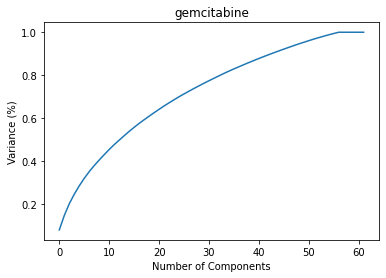

In [54]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title(drug_list[0])
plt.show() #50 components max? 

<BarContainer object of 62 artists>

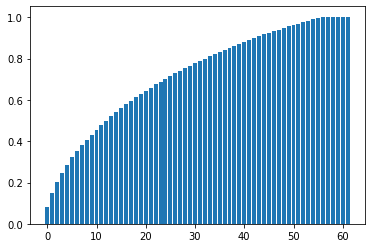

In [55]:
plt.bar(range(62),np.cumsum(pca.explained_variance_ratio_.round(3)))

In [56]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_.round(3))
np.argwhere(0.901>pca_cumsum)#90% is 42 components, 80% is 32 components
#try with 32 components

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42]])

In [57]:
def pca_transform_data(x_data_dfs, ncomponents):
    scaler = MinMaxScaler(feature_range=[0, 1])
    pca = PCA(n_components=ncomponents)
    pca_dfs = []
    for drug_df in x_data_dfs:
        scaled_df = scaler.fit_transform(drug_df)
        pca_df = pca.fit_transform(scaled_df)
        pca_dfs.append(pca_df)
    return pca_dfs

In [58]:
pca_dfs = pca_transform_data(list_x, 32)

In [59]:
pca_dfs[0].shape, pca_dfs[1].shape

((62, 32), (60, 32))

In [60]:
pca32x_trains, pca32x_tests, y_trains, y_tests = batch_train_test_split(pca_dfs, list_y)

In [61]:
y_preds_pca32 = run_logreg(pca32x_trains, pca32x_tests, y_trains, y_tests, drug_list, c=0.001) #wildly overfit, but decreased log loss 

gemcitabine
score = 0.8478260869565217
loss log = 6.47607054888514


sunitinib
score = 0.8444444444444444
loss log = 11.512978771465574


doxorubicin
score = 0.8823529411764706
loss log = 8.63489399808522




In [62]:
def sparce_pca_transform_data(x_data_dfs, ncomponents):
    scaler = MinMaxScaler(feature_range=[0, 1])
    sparsePCA_transformer = SparsePCA(ncomponents, random_state=0)
    pca_dfs = []
    for drug_df in x_data_dfs:
        scaled_df = scaler.fit_transform(drug_df)
        pca_df = sparsePCA_transformer.fit_transform(scaled_df)
        pca_dfs.append(pca_df)
    return pca_dfs

In [63]:
# sparce_pca_dfs = sparce_pca_transform_data(list_x, 32)
# %time

In [64]:
#drug_dfs[0].corr()
#%time

In [65]:
drug_dfs_values_only = [df.drop(columns=['index','id','drug_name']) for df in drug_dfs]

In [66]:
drug_dfs_values_only[0].iloc[:,np.r_[0:5, -1]]

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,vital_status
19,21.023010,4.698284,22.983041,2.520023,0.469418,0
20,19.843534,0.241418,10.711546,1.465249,0.497112,0
38,8.908702,0.114636,20.933515,1.901142,0.717593,0
49,11.133349,0.000000,20.704402,2.044744,0.560496,0
50,18.431117,0.177102,23.960874,1.849370,0.928399,0
...,...,...,...,...,...,...
474,7.864384,0.328180,61.969671,1.743994,1.115160,1
480,4.803510,0.953010,9.981320,0.635729,0.215869,1
488,1.295512,8.346813,27.546295,1.839392,1.886007,1
492,5.330827,0.805405,27.660611,1.546114,1.721013,0


In [88]:
drug_dfs_values_only[0]

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ENSGR0000264510,ENSGR0000264819,ENSGR0000265658,ENSGR0000270726,ENSGR0000275287,ENSGR0000276543,ENSGR0000277120,ENSGR0000280767,ENSGR0000281849,vital_status
19,21.023010,4.698284,22.983041,2.520023,0.469418,1.552196,13.924939,28.691723,5.467230,7.892208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20,19.843534,0.241418,10.711546,1.465249,0.497112,0.930400,28.637315,27.371243,1.936201,3.725314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
38,8.908702,0.114636,20.933515,1.901142,0.717593,3.416073,8.744393,28.441160,3.210180,8.010185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49,11.133349,0.000000,20.704402,2.044744,0.560496,2.262629,0.892103,47.752124,9.209692,9.787083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
50,18.431117,0.177102,23.960874,1.849370,0.928399,0.932157,3.645760,28.621363,3.833655,6.840575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,7.864384,0.328180,61.969671,1.743994,1.115160,2.224356,17.646799,38.213663,2.887524,6.884513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
480,4.803510,0.953010,9.981320,0.635729,0.215869,0.354423,1.941930,14.554487,0.884119,1.699907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
488,1.295512,8.346813,27.546295,1.839392,1.886007,2.115162,0.950923,25.674871,1.891005,7.008985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
492,5.330827,0.805405,27.660611,1.546114,1.721013,4.393303,10.847711,44.014800,2.779097,6.636879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [89]:
#check stdev for each column of data sets
std_devs = [df.std() for df in drug_dfs_values_only]

In [103]:
std_devs_dfs = [pd.DataFrame(std_dev) for std_dev in std_devs]
std_devs_dfs[0].T
std_devs_df = pd.concat(std_devs_dfs, axis = 1)
std_devs_df = std_devs_df.T.reset_index(drop=True)

In [107]:
std_devs_df.sort_values(axis=1, by=2, ascending=False )

,TMSB10,MT-CO1,FTL,MT-ND4,COL1A1,MT-CO3,MT-RNR2,MT-ND3,COL3A1,MT-CO2,...,AL137847.3,LDHBP3,MTCO2P32,ENSG00000273801,AC119619.1,ENSG00000273798,RNA5SP215,RPL36AP6,MIR548AQ,AC245014.2
0,2201.455713,6099.205086,2315.691848,6090.143454,1286.285036,6491.406278,7595.888186,4038.317069,1333.851671,5030.833649,...,0.046290,0.003907,0.005350,0.0,0.052922,0.03937,0.000000,0.006144,0.071973,0.0
1,1946.927940,7330.246215,3585.550581,7264.010252,126.419242,8650.906535,6921.505762,4578.837972,128.101334,8604.241604,...,0.015544,0.005353,0.005837,0.0,0.000000,0.00000,0.016039,0.012592,0.097714,0.0
2,2879.586520,2688.579304,2579.885157,2432.497767,2375.183424,2088.616955,1986.469961,1790.824272,1760.358163,1609.104287,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0


In [108]:
std_means = std_devs_df.mean()

In [109]:
std_devs_df=std_devs_df.append(std_means, ignore_index=True)

In [110]:
std_devs_df.sort_values(axis=1, by=3, ascending=False )

,MT-CO3,MT-RNR2,MT-CO1,MT-ND4,MT-CO2,MT-ATP6,MT-ND3,MT-CYB,MT-ND2,FTL,...,AC018659.4,AL359751.2,RNU6-1021P,ENSG00000265080,ENSG00000265084,AL049765.2,ENSG00000275957,AC104211.3,MTND4LP26,AL136982.4
0,6491.406278,7595.888186,6099.205086,6090.143454,5030.833649,4066.759122,4038.317069,3305.486370,3506.076110,2315.691848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8650.906535,6921.505762,7330.246215,7264.010252,8604.241604,5128.642596,4578.837972,4667.057588,4118.564542,3585.550581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2088.616955,1986.469961,2688.579304,2432.497767,1609.104287,1525.934277,1790.824272,1471.624969,1107.920859,2579.885157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5743.643256,5501.287969,5372.676868,5262.217158,5081.393180,3573.778665,3469.326437,3148.056309,2910.853837,2827.042529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
std_devs_df.loc[3].describe() #maybe take everything with a standard deviation above 1?

count    60484.000000
mean         4.274751
std         65.031057
min          0.000000
25%          0.020227
50%          0.106299
75%          1.115153
max       5743.643256
Name: 3, dtype: float64

In [129]:
names_of_genes_high_stddev = std_devs_df.loc[3][std_devs_df.loc[3]>1].index #uses the first 15769 columns 

In [144]:
stdev_genes = list(names_of_genes_high_stddev)

In [146]:
stdev_genes.append('vital_status')

In [148]:
stdev_genes[-1]

'vital_status'

In [149]:
std_dev_limit_drug_dfs = [df.loc[:,stdev_genes] for df in drug_dfs_values_only]

In [150]:
std_dev_limit_drug_dfs[0]

,TSPAN6,TNMD,DPM1,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,ENSG00000281527,ENSG00000281555,ENSG00000281599,EBLN3P,ENSG00000281656,LINC01230,ENSG00000281789,AC018638.8,AC007389.5,vital_status
19,21.023010,4.698284,22.983041,1.552196,13.924939,28.691723,5.467230,7.892208,1.784560,8.183805,...,0.780140,0.444912,1.773792,12.603539,0.312056,2.110024,1.103693,2.025588,0.060398,0
20,19.843534,0.241418,10.711546,0.930400,28.637315,27.371243,1.936201,3.725314,0.783573,3.125982,...,0.213094,0.607634,1.615028,4.619632,0.000000,0.074586,2.799382,1.892820,0.109984,0
38,8.908702,0.114636,20.933515,3.416073,8.744393,28.441160,3.210180,8.010185,0.828378,3.528768,...,1.538030,2.558307,2.914162,7.233935,0.384507,0.018352,1.942774,3.743816,0.049614,0
49,11.133349,0.000000,20.704402,2.262629,0.892103,47.752124,9.209692,9.787083,0.742035,5.314805,...,0.176844,1.512806,0.446764,12.698088,0.000000,0.000000,0.000000,1.329164,0.068456,0
50,18.431117,0.177102,23.960874,0.932157,3.645760,28.621363,3.833655,6.840575,1.490833,7.216290,...,0.848614,1.008255,1.071934,9.660302,0.000000,2.112957,1.500707,1.594549,0.164248,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,7.864384,0.328180,61.969671,2.224356,17.646799,38.213663,2.887524,6.884513,0.209523,0.661938,...,1.719955,1.144366,0.434515,6.751837,1.031973,0.476137,1.042836,2.409161,0.199737,1
480,4.803510,0.953010,9.981320,0.354423,1.941930,14.554487,0.884119,1.699907,0.821266,1.228727,...,0.197318,0.750199,0.249244,0.975907,0.000000,0.012557,2.791532,0.000000,3.666297,1
488,1.295512,8.346813,27.546295,2.115162,0.950923,25.674871,1.891005,7.008985,1.557552,4.399648,...,2.758286,0.000000,0.000000,7.152908,0.344786,0.000000,0.000000,1.825769,0.289175,1
492,5.330827,0.805405,27.660611,4.393303,10.847711,44.014800,2.779097,6.636879,1.549829,3.767364,...,3.570899,0.885423,1.176681,6.138415,0.000000,0.004940,2.039580,2.545986,0.080132,0


In [152]:
#split into x and y
stdev_x_list = [df.iloc[:,0:-1] for df in std_dev_limit_drug_dfs]

In [153]:
stdev_y_list = [df.iloc[:,-1] for df in std_dev_limit_drug_dfs]

,TSPAN6,TNMD,DPM1,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,CICP14,ENSG00000281527,ENSG00000281555,ENSG00000281599,EBLN3P,ENSG00000281656,LINC01230,ENSG00000281789,AC018638.8,AC007389.5
19,21.023010,4.698284,22.983041,1.552196,13.924939,28.691723,5.467230,7.892208,1.784560,8.183805,...,1.134915,0.780140,0.444912,1.773792,12.603539,0.312056,2.110024,1.103693,2.025588,0.060398
20,19.843534,0.241418,10.711546,0.930400,28.637315,27.371243,1.936201,3.725314,0.783573,3.125982,...,1.198068,0.213094,0.607634,1.615028,4.619632,0.000000,0.074586,2.799382,1.892820,0.109984
38,8.908702,0.114636,20.933515,3.416073,8.744393,28.441160,3.210180,8.010185,0.828378,3.528768,...,2.080731,1.538030,2.558307,2.914162,7.233935,0.384507,0.018352,1.942774,3.743816,0.049614
49,11.133349,0.000000,20.704402,2.262629,0.892103,47.752124,9.209692,9.787083,0.742035,5.314805,...,1.217973,0.176844,1.512806,0.446764,12.698088,0.000000,0.000000,0.000000,1.329164,0.068456
50,18.431117,0.177102,23.960874,0.932157,3.645760,28.621363,3.833655,6.840575,1.490833,7.216290,...,1.334424,0.848614,1.008255,1.071934,9.660302,0.000000,2.112957,1.500707,1.594549,0.164248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,7.864384,0.328180,61.969671,2.224356,17.646799,38.213663,2.887524,6.884513,0.209523,0.661938,...,1.794998,1.719955,1.144366,0.434515,6.751837,1.031973,0.476137,1.042836,2.409161,0.199737
480,4.803510,0.953010,9.981320,0.354423,1.941930,14.554487,0.884119,1.699907,0.821266,1.228727,...,0.235742,0.197318,0.750199,0.249244,0.975907,0.000000,0.012557,2.791532,0.000000,3.666297
488,1.295512,8.346813,27.546295,2.115162,0.950923,25.674871,1.891005,7.008985,1.557552,4.399648,...,1.072218,2.758286,0.000000,0.000000,7.152908,0.344786,0.000000,0.000000,1.825769,0.289175
492,5.330827,0.805405,27.660611,4.393303,10.847711,44.014800,2.779097,6.636879,1.549829,3.767364,...,1.893084,3.570899,0.885423,1.176681,6.138415,0.000000,0.004940,2.039580,2.545986,0.080132


In [155]:
stdev_x_trains, stdev_x_tests, stdev_y_trains, stdev_y_tests = batch_train_test_split(stdev_x_list,stdev_y_list)

In [157]:
y_preds_stdev = run_logreg(stdev_x_trains, stdev_x_tests, stdev_y_trains, stdev_y_tests, drug_list, c=0.0001) #no change 

gemcitabine
score = 1.0
loss log = 17.269538121973504


sunitinib
score = 1.0
loss log = 9.210446984966874


doxorubicin
score = 1.0
loss log = 11.513125364327776




In [158]:
#try increasing the cutoff by alot
names_of_genes_5_stddev = std_devs_df.loc[3][std_devs_df.loc[3]>5].index #uses the first 6274 columns 

In [163]:
stdev_5_genes = list(names_of_genes_5_stddev)

In [164]:
stdev_5_genes.append('vital_status')

In [165]:
stdev_5_genes[-1]

'vital_status'

In [166]:
len(stdev_5_genes)

6274

In [167]:
std_dev_5limit_drug_dfs = [df.loc[:,stdev_5_genes] for df in drug_dfs_values_only]

In [168]:
std_dev_5limit_drug_dfs[0]

,TSPAN6,TNMD,DPM1,CFH,FUCA2,SEMA3F,CFTR,BAD,LAP3,CD99,...,AC090498.1,ENSG00000279496,AC115618.3,AP000892.4,AC026401.3,ENSG00000280237,IGHV1-69D,ENSG00000280527,LINC01127,vital_status
19,21.023010,4.698284,22.983041,13.924939,28.691723,9.488158,2.562399,17.241277,36.965899,29.305138,...,20.683103,2.245505,6.449647,0.942144,1.290681,0.272656,1.567113,7.118585,0.467962,0
20,19.843534,0.241418,10.711546,28.637315,27.371243,15.828121,0.076861,31.392182,10.874379,47.043669,...,24.327266,13.171200,14.536517,0.215094,3.942963,0.150536,0.199095,2.835626,11.717116,0
38,8.908702,0.114636,20.933515,8.744393,28.441160,16.674206,0.498410,19.601775,42.559335,86.785342,...,28.160682,9.835927,10.769827,0.755442,3.117911,1.583301,3.143418,3.106516,1.773079,0
49,11.133349,0.000000,20.704402,0.892103,47.752124,9.318731,0.011960,17.235480,22.637558,39.961198,...,9.593909,13.917060,5.672331,0.111565,1.751600,0.009863,0.206533,2.185165,0.088399,0
50,18.431117,0.177102,23.960874,3.645760,28.621363,11.335489,0.774783,16.622506,26.646265,17.991450,...,17.214151,1.588394,4.025427,0.428291,2.216788,0.646814,0.346879,3.629717,0.068932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,7.864384,0.328180,61.969671,17.646799,38.213663,11.892707,0.017448,26.043418,29.938937,240.604285,...,14.199135,1.216190,20.163536,1.174969,9.360298,0.297362,0.080348,16.184604,0.017195,1
480,4.803510,0.953010,9.981320,1.941930,14.554487,6.056430,0.000000,156.774996,6.941426,160.065586,...,47.007277,5.860039,10.474108,15.617100,57.944402,0.179741,0.046089,3.938547,0.000000,1
488,1.295512,8.346813,27.546295,0.950923,25.674871,5.202221,0.046635,39.397624,18.106307,163.042915,...,20.534659,11.257822,18.068395,15.701410,56.629297,1.964558,0.362403,19.007594,0.008617,1
492,5.330827,0.805405,27.660611,10.847711,44.014800,8.236766,0.015750,14.363589,26.576303,180.457595,...,23.510487,2.699364,17.359503,0.167908,10.460274,5.212578,11.096873,7.378527,0.015522,0


In [169]:
#split into x and y
stdev5_x_list = [df.iloc[:,0:-1] for df in std_dev_5limit_drug_dfs]

In [170]:
stdev5_y_list = [df.iloc[:,-1] for df in std_dev_5limit_drug_dfs]

In [171]:
stdev5_x_trains, stdev5_x_tests, stdev5_y_trains, stdev5_y_tests = batch_train_test_split(stdev5_x_list,stdev5_y_list)

In [172]:
y_preds_stdev = run_logreg(stdev5_x_trains, stdev5_x_tests, stdev5_y_trains, stdev5_y_tests, drug_list, c=0.0001) #no change, regardless of limit 

gemcitabine
score = 1.0
loss log = 17.269538121973504


sunitinib
score = 1.0
loss log = 9.210446984966874


doxorubicin
score = 1.0
loss log = 11.513125364327776




In [244]:
#try increasing the cutoff by alot
names_of_genes_5_stddev = std_devs_df.loc[3][std_devs_df.loc[3]>680].index #uses the first 33 columns 

In [245]:
stdev_5_genes = list(names_of_genes_5_stddev)

In [246]:
stdev_5_genes.append('vital_status')

In [247]:
stdev_5_genes[-1]

'vital_status'

In [248]:
len(stdev_5_genes)

33

In [249]:
std_dev_5limit_drug_dfs = [df.loc[:,stdev_5_genes] for df in drug_dfs_values_only]

In [250]:
std_dev_5limit_drug_dfs[0]

,CD74,TMSB10,ACTB,FTL,MYL9,COL1A1,GAPDH,RPS12,SPP1,COL1A2,...,MT-RNR2,GPX3,MT-RNR1,IGKC,IGLV1-40,IGHG1,IGHM,MT-ND4L,MT-ATP8,vital_status
19,577.309885,729.546678,1021.522622,4454.249055,86.197811,33.266143,449.064191,634.201960,2898.018018,39.267365,...,10487.868111,2024.452836,2119.248884,30.467141,28.706086,24.876050,20.740206,3494.674242,4037.443931,0
20,387.745323,2760.130323,1618.498291,4652.340903,205.411388,156.820480,3531.858733,470.378085,1056.008784,150.038923,...,39897.787787,1486.461474,4749.287858,4.711314,0.351841,1.938997,0.411886,6924.528809,6407.988325,0
38,1630.755925,2518.176395,1384.555530,4675.974758,81.264235,214.750867,1588.918346,417.830743,515.823763,125.397676,...,7559.979469,977.603404,466.322877,58.922672,30.246658,31.973537,21.545319,5239.865345,4566.209672,0
49,601.373509,745.347140,855.432534,3382.183599,28.050343,32.968565,1288.723615,281.416139,704.419457,26.574953,...,2655.519461,2551.865437,492.797058,3.340007,0.125138,3.307517,0.626670,1415.096910,1258.761940,0
50,232.381725,383.067231,978.160378,4121.203513,59.403602,12.748142,580.400938,512.222262,649.778958,19.055940,...,17684.525362,4076.265519,2982.809871,9.096196,1.351111,3.944124,25.296110,7319.615471,6010.353804,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,452.584923,2742.118347,1591.540499,6247.841105,889.412087,1277.911788,387.537140,990.349510,53.739064,1905.195814,...,2906.978195,57.626043,620.187566,4.526247,0.405690,3.464279,0.685673,903.410588,1360.249913,1
480,408.811346,13904.203565,2429.880608,2483.521849,3541.851402,372.324339,1160.400330,3114.182607,7.989980,260.425915,...,2556.051660,9.288610,923.438718,65.022795,0.977379,52.484614,20.158228,453.727958,219.989649,1
488,204.657186,1821.736580,3497.016805,974.491708,1518.889554,281.294592,1357.776154,273.857867,18.674582,437.345061,...,1376.895955,87.107068,565.465946,5.369977,1.260543,7.150714,4.505354,1025.747997,764.005204,1
492,909.696965,2266.734834,1644.434088,6760.689767,154.847469,3222.641027,507.867177,2297.216417,15.000948,1356.736256,...,2665.269853,13.231800,297.733138,68.304173,12.597520,97.521144,44.507557,878.870958,700.229301,0


In [251]:
#split into x and y
stdev5_x_list = [df.iloc[:,0:-1] for df in std_dev_5limit_drug_dfs]

In [252]:
stdev5_y_list = [df.iloc[:,-1] for df in std_dev_5limit_drug_dfs]

In [253]:
stdev5_x_trains, stdev5_x_tests, stdev5_y_trains, stdev5_y_tests = batch_train_test_split(stdev5_x_list,stdev5_y_list)

In [254]:
y_preds_stdev = run_logreg(stdev5_x_trains, stdev5_x_tests, stdev5_y_trains, stdev5_y_tests, drug_list, c=0.0001) #small change using 13 factors 

gemcitabine
score = 1.0
loss log = 12.952191072609667


sunitinib
score = 1.0
loss log = 9.210393678471528


doxorubicin
score = 1.0
loss log = 17.26958809681289




In [233]:
std_scaled = scaler.fit_transform(stdev_x_list[0])
%time

CPU times: user 13 µs, sys: 2 µs, total: 15 µs
Wall time: 52 µs


In [234]:
std_scaled.shape

(62, 15771)

In [235]:
pca = PCA().fit(std_scaled)
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [53]:
#pca_sparse= SparsePCA(random_state=0).fit(gem_scaled)
#%time

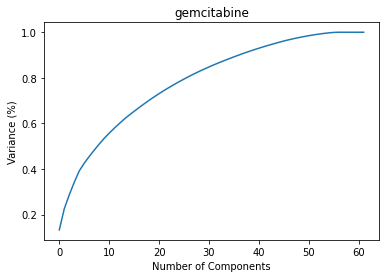

In [236]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title(drug_list[0])
plt.show() #50 components max? 

<BarContainer object of 62 artists>

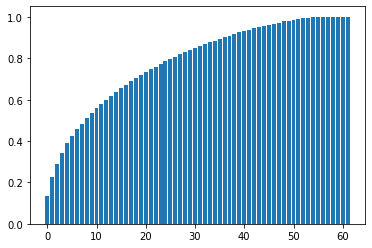

In [237]:
plt.bar(range(62),np.cumsum(pca.explained_variance_ratio_.round(3)))

In [238]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_.round(3))
np.argwhere(0.901>pca_cumsum)#90% is 42 components, 80% is 35 components
#try with 35 components

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35]])

In [57]:
def pca_transform_data(x_data_dfs, ncomponents):
    scaler = MinMaxScaler(feature_range=[0, 1])
    pca = PCA(n_components=ncomponents)
    pca_dfs = []
    for drug_df in x_data_dfs:
        scaled_df = scaler.fit_transform(drug_df)
        pca_df = pca.fit_transform(scaled_df)
        pca_dfs.append(pca_df)
    return pca_dfs

In [239]:
pca_dfs = pca_transform_data(stdev_x_list, 35)

In [240]:
pca_dfs[0].shape, pca_dfs[1].shape

((62, 35), (60, 35))

In [241]:
pca35x_trains, pca35x_tests, y_trains, y_tests = batch_train_test_split(pca_dfs, list_y)

In [243]:
y_preds_pca35_stdev = run_logreg(pca32x_trains, pca32x_tests, y_trains, y_tests, drug_list, c=0.001) #wildly overfit, but decreased log loss 

gemcitabine
score = 0.8478260869565217
loss log = 6.47607054888514


sunitinib
score = 0.8444444444444444
loss log = 11.512978771465574


doxorubicin
score = 0.8823529411764706
loss log = 8.63489399808522




In [256]:
std_scaled = scaler.fit_transform(stdev5_x_list[0])
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [257]:
std_scaled.shape

(62, 32)

In [258]:
pca = PCA().fit(std_scaled)
%time

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 11.7 µs


In [259]:
#pca_sparse= SparsePCA(random_state=0).fit(gem_scaled)
#%time

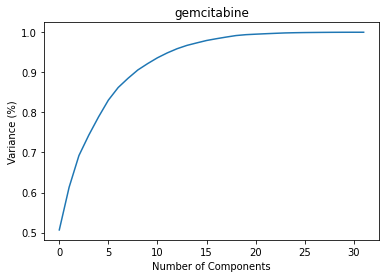

In [260]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title(drug_list[0])
plt.show() #50 components max? 

<BarContainer object of 32 artists>

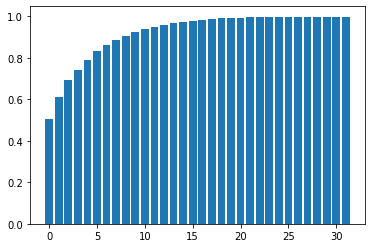

In [263]:
plt.bar(range(32),np.cumsum(pca.explained_variance_ratio_.round(3)))

In [265]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_.round(3))
np.argwhere(0.901>pca_cumsum)#90% is 7 components,
#try with 7 components

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [266]:
def pca_transform_data(x_data_dfs, ncomponents):
    scaler = MinMaxScaler(feature_range=[0, 1])
    pca = PCA(n_components=ncomponents)
    pca_dfs = []
    for drug_df in x_data_dfs:
        scaled_df = scaler.fit_transform(drug_df)
        pca_df = pca.fit_transform(scaled_df)
        pca_dfs.append(pca_df)
    return pca_dfs

In [269]:
pca_dfs = pca_transform_data(stdev_x_list, 7)

In [270]:
pca_dfs[0].shape, pca_dfs[1].shape

((62, 7), (60, 7))

In [271]:
pca35x_trains, pca35x_tests, y_trains, y_tests = batch_train_test_split(pca_dfs, list_y)

In [273]:
y_preds_pca35_stdev33 = run_logreg(pca32x_trains, pca32x_tests, y_trains, y_tests, drug_list, c=0.001) #wildly overfit, but decreased log loss 

gemcitabine
score = 0.8478260869565217
loss log = 6.47607054888514


sunitinib
score = 0.8444444444444444
loss log = 11.512978771465574


doxorubicin
score = 0.8823529411764706
loss log = 8.63489399808522




In [277]:
#find pairwise correlation
scaler = MinMaxScaler(feature_range=[0, 1])
gem_scaled = scaler.fit_transform(gem_x)
%time

CPU times: user 10 µs, sys: 2 µs, total: 12 µs
Wall time: 28.1 µs


In [279]:
gem_scaled = pd.DataFrame(gem_scaled, columns = gem_x.columns)

In [285]:
gem_scaled.shape, len(list_y[0])# this is the x values 


((62, 60483), 62)

In [298]:
corr_with = gem_scaled.corrwith(list_y[0], axis = 1, method = 'pearson')

In [308]:
corr_with.sort_values()

TSPAN6            NaN
TNMD              NaN
DPM1              NaN
SCYL3             NaN
C1orf112          NaN
                   ..
ENSGR0000275287   NaN
ENSGR0000276543   NaN
ENSGR0000277120   NaN
ENSGR0000280767   NaN
ENSGR0000281849   NaN
Length: 60483, dtype: float64

In [317]:
gem_scaled['vital_status']=list_y[0].values

In [362]:
corr_test = gem_scaled.iloc[:,np.r_[0:3000, -1]].corr()
%time

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 40.1 µs


In [366]:
corr_test.stack().vital_status

TSPAN6         -0.463340
TNMD           -0.232343
DPM1            0.263317
SCYL3           0.233539
C1orf112        0.316409
                  ...   
SF3A2           0.324046
AMH             0.272370
DKKL1          -0.049004
LYL1            0.247607
vital_status    1.000000
Length: 2998, dtype: float64

In [340]:
#corr_0_6000_stack = corr_0_6000.stack()
corr_0_6000_stack[(corr_0_6000_stack !=1) & (abs(corr_0_6000_stack)>0.6)].vital_status.sort_values()


MLYCD     -0.650911
HERPUD1   -0.633461
HOXA5     -0.606441
ENPP5     -0.602495
dtype: float64

In [454]:
corr_0_6000.vital_status.abs()

TSPAN6          0.463340
TNMD            0.232343
DPM1            0.263317
SCYL3           0.233539
C1orf112        0.316409
                  ...   
RFPL1           0.160976
RFPL2           0.288003
C22orf24        0.300763
POM121L9P       0.041926
vital_status    1.000000
Name: vital_status, Length: 6001, dtype: float64

In [442]:
def piecewise_corr(dataframe, chunk):
    all_corrs = []
    big_1Dcorr= []
    n= 0
    increase = chunk
    iterations = dataframe.shape[1]//chunk
    for value in range(0,iterations+1):
        if chunk<(dataframe.shape[1]-1):
            print(n, chunk)
            corr_df = dataframe.iloc[:,np.r_[n:chunk, -1]].corr()
            all_corrs.append(corr_df)
            subset_vital_status = corr_df.stack().vital_status.abs()
            big_1Dcorr.append(subset_vital_status)
            n = chunk+1
            chunk = chunk+increase
        else: 
            chunk =(dataframe.shape[1]-1)
            corr_df = dataframe.iloc[:,np.r_[n:chunk, -1]].corr()
            all_corrs.append(corr_df)
            subset_vital_status = corr_df.stack().vital_status.abs()
            big_1Dcorr.append(subset_vital_status)
            print(n,chunk)
             
    corr_1D = pd.concat(big_1Dcorr)
    return all_corrs, corr_1D, big_1Dcorr

In [443]:
all_corrs, corr_1D, big_1Dcorr= piecewise_corr(gem_scaled, 3000)

0 3000
3001 6000
6001 9000
9001 12000
12001 15000
15001 18000
18001 21000
21001 24000
24001 27000
27001 30000
30001 33000
33001 36000
36001 39000
39001 42000
42001 45000
45001 48000
48001 51000
51001 54000
54001 57000
57001 60000
60001 60483


In [453]:
len(big_1Dcorr[2]) #why am I loosing some values here? 

2987

In [467]:
corr_1D.sort_values(ascending=False)[21:422]

GCSH          0.659266
MLYCD         0.650911
HERPUD1       0.633461
AP1G1         0.632853
WWC2          0.629873
                ...   
AC116351.1    0.500454
TTLL11        0.500446
DELE1         0.500444
MT-ND4L       0.500263
TLR3          0.500177
Length: 401, dtype: float64

In [497]:
corr_top_genes = corr_1D.sort_values(ascending=False)[21:422].index

In [498]:
corr_genes = list(corr_top_genes)

In [499]:
genes_in_each_list = [corr_gene if corr_gene in stdev_genes else 1 for corr_gene in corr_genes]

In [500]:
sum_mismatch = sum([1 if gene==1 else 0 for gene in genes_in_each_list])
sum_mismatch

74

In [501]:
corr_genes.append('vital_status')

In [502]:
corr_genes_drug_dfs = [df.loc[:,corr_genes] for df in drug_dfs_values_only]

In [503]:
corr_genes_drug_dfs[0]

,GCSH,MLYCD,HERPUD1,AP1G1,WWC2,TNFRSF10D,ARF3,DMRTA1,HOXA5,NOSTRIN,...,WDFY3-AS2,AMZ2P1,AC005280.1,DPH7,AC116351.1,TTLL11,DELE1,MT-ND4L,TLR3,vital_status
19,5.393921,1.365238,32.386510,15.855856,10.179677,3.209114,59.366752,1.646069,9.029332,5.502841,...,4.233055,1.657828,0.374467,1.800790,1.230300,1.105923,10.435789,3494.674242,5.406496,0
20,4.961915,2.703805,41.989470,9.037978,2.216896,3.827741,47.220461,0.951404,7.022738,4.853085,...,0.890439,1.315018,0.421174,1.389706,2.673160,0.758096,8.738297,6924.528809,17.201664,0
38,4.879154,3.073204,49.422221,9.956011,4.144624,9.316861,43.462101,0.420894,6.595417,3.819284,...,1.553155,2.865567,0.624259,2.086909,1.733265,0.589977,11.003004,5239.865345,11.410332,0
49,4.614506,2.684014,33.206512,19.873041,6.863388,6.439570,49.230722,0.853578,3.142793,0.388195,...,2.690382,1.694184,0.674089,1.733745,1.984394,0.677161,15.340266,1415.096910,5.804615,0
50,5.579188,1.445496,32.780382,15.490225,7.336605,4.121704,44.442823,1.320236,6.609945,3.027069,...,4.071379,1.430634,0.569071,2.808107,1.128886,0.939117,10.720579,7319.615471,3.383351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,1.598460,0.921566,18.817740,4.767000,2.001402,1.227400,29.342525,0.094877,5.900442,3.278402,...,1.179207,3.038676,0.048563,10.796166,0.014226,2.998706,7.178586,903.410588,0.294674,1
480,1.299780,0.831029,4.339696,1.499186,0.180568,2.157672,49.912561,0.115648,1.165182,2.432788,...,0.451958,8.607119,0.000000,5.041466,0.005440,1.446813,6.381007,453.727958,0.785986,1
488,0.554592,0.456727,7.862319,4.551925,1.159111,0.028066,20.976648,0.219910,1.182815,1.911038,...,0.120061,2.294997,0.000000,3.698260,0.057035,2.078663,8.443174,1025.747997,5.897251,1
492,1.181271,1.174035,24.729243,8.764950,2.004033,1.133223,26.245487,0.109731,2.846460,3.135424,...,1.369601,1.707580,0.021919,3.357287,0.038524,0.952884,6.736288,878.870958,1.580458,0


In [504]:
#split into x and y
corr_x_list = [df.iloc[:,0:-1] for df in corr_genes_drug_dfs]

In [505]:
corr_y_list = [df.iloc[:,-1] for df in corr_genes_drug_dfs]

In [512]:
corr_y_list[0].equals(list_y[0])

True

In [513]:
corr_x_trains, corr_x_tests, corr_y_trains, corr_y_tests = batch_train_test_split(corr_x_list,corr_y_list)

In [514]:
y_preds_corr = run_logreg(corr_x_trains, corr_x_tests, corr_y_trains, corr_y_tests, drug_list, c=0.0001) #made a difference

gemcitabine
score = 0.9130434782608695
loss log = 4.317397024203223


sunitinib
score = 0.9777777777777777
loss log = 9.210393678471528


doxorubicin
score = 0.9117647058823529
loss log = 14.391356730570331




In [515]:
# run with PCA

In [516]:
corr_scaled = scaler.fit_transform(corr_x_list[0])
%time

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 44.1 µs


In [517]:
corr_scaled.shape

(62, 401)

In [518]:
pca = PCA().fit(corr_scaled)
%time

CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 11 µs


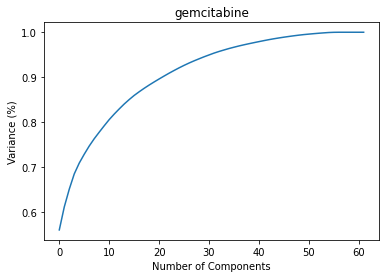

In [519]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title(drug_list[0])
plt.show() #50 components max? 

<BarContainer object of 62 artists>

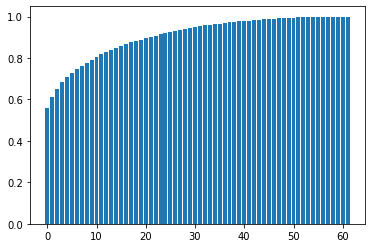

In [521]:
plt.bar(range(62),np.cumsum(pca.explained_variance_ratio_.round(3)))

In [524]:
pca_cumsum = np.cumsum(pca.explained_variance_ratio_.round(3))
np.argwhere(0.801>pca_cumsum)#90% is 20 components,
#80% is 9 components

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [266]:
def pca_transform_data(x_data_dfs, ncomponents):
    scaler = MinMaxScaler(feature_range=[0, 1])
    pca = PCA(n_components=ncomponents)
    pca_dfs = []
    for drug_df in x_data_dfs:
        scaled_df = scaler.fit_transform(drug_df)
        pca_df = pca.fit_transform(scaled_df)
        pca_dfs.append(pca_df)
    return pca_dfs

In [529]:
corr_pca_dfs = pca_transform_data(corr_x_list, 20)

In [530]:
corr_pca_dfs[0].shape, corr_pca_dfs[1].shape

((62, 20), (60, 20))

In [531]:
corr_pca_trains, corr_pca_tests, y_trains, y_tests = batch_train_test_split(corr_pca_dfs, list_y)

In [532]:
y_preds_corr_pca = run_logreg(pca32x_trains, pca32x_tests, y_trains, y_tests, drug_list, c=0.001) #worse fit and worse log loss

gemcitabine
score = 0.8478260869565217
loss log = 6.47607054888514


sunitinib
score = 0.8444444444444444
loss log = 11.512978771465574


doxorubicin
score = 0.8823529411764706
loss log = 8.63489399808522




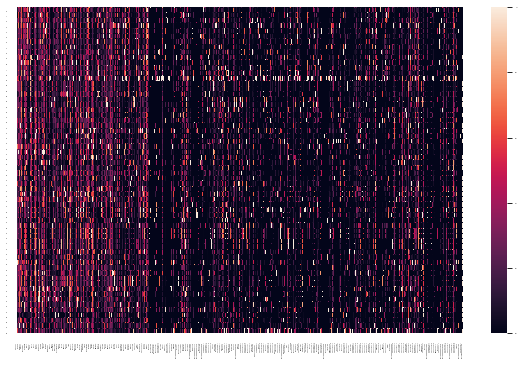

In [576]:
sns.set_context("paper", font_scale=0.2)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(gem_scaled)